In [21]:
import yt
from matplotlib import rc_context
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
print(yt.__version__)

temperature = 0.
alpha0 = 0.8

step = 1
plot_file_hydrovs_root = ""

plot_file_hydrovs_root += "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz)
plot_file_path = plot_file_hydrovs_root + f"{step:07d}"
ds = yt.load(plot_file_path)
print(ds.field_list)
#profile_data = ds.all_data()[("boxlib", "struct_fact_rho_rho")].to_ndarray()
profile_data = ds.covering_grid(
    level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions
)
rho = profile_data["boxlib", "rho"] # density
phi = profile_data["boxlib", "phi"] # potential
ufx = profile_data["boxlib", "ufx"] # magnitude
afx = profile_data["boxlib", "afx"] # magnitude
agx = profile_data["boxlib", "agx"] # magnitude

np.set_printoptions(formatter={'float_kind': lambda x: "%f" % x})
print(rho)
#print(0.5*afx + 0.25*phi/(rho+phi)*(afx-agx) - ufx)

yt : [INFO     ] 2025-04-13 06:00:11,721 Parameters: current_time              = 1.0
yt : [INFO     ] 2025-04-13 06:00:11,723 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-04-13 06:00:11,724 Parameters: domain_left_edge          = [0.000000 0.000000 0.000000]
yt : [INFO     ] 2025-04-13 06:00:11,725 Parameters: domain_right_edge         = [1.000000 1.000000 1.000000]


4.4.0
[('boxlib', 'afx'), ('boxlib', 'afy'), ('boxlib', 'afz'), ('boxlib', 'agx'), ('boxlib', 'agy'), ('boxlib', 'agz'), ('boxlib', 'p_bulk'), ('boxlib', 'phi'), ('boxlib', 'rho'), ('boxlib', 'ufx'), ('boxlib', 'ufy'), ('boxlib', 'ufz'), ('boxlib', 'ugx'), ('boxlib', 'ugy'), ('boxlib', 'ugz')]
[[[1.006430 1.006430 1.006430 ... 1.006430 1.006430 1.006430]
  [1.006430 1.006430 1.006430 ... 1.006430 1.006430 1.006430]
  [1.006430 1.006430 1.006430 ... 1.006430 1.006430 1.006430]
  ...
  [1.006430 1.006430 1.006430 ... 1.006430 1.006430 1.006430]
  [1.006430 1.006430 1.006430 ... 1.006430 1.006430 1.006430]
  [1.006430 1.006430 1.006430 ... 1.006430 1.006430 1.006430]]

 [[1.003065 1.003065 1.003065 ... 1.003065 1.003065 1.003065]
  [1.003065 1.003065 1.003065 ... 1.003065 1.003065 1.003065]
  [1.003065 1.003065 1.003065 ... 1.003065 1.003065 1.003065]
  ...
  [1.003065 1.003065 1.003065 ... 1.003065 1.003065 1.003065]
  [1.003065 1.003065 1.003065 ... 1.003065 1.003065 1.003065]
  [1.0030

yt : [INFO     ] 2025-04-16 01:15:37,802 Parameters: current_time              = 20000.0
yt : [INFO     ] 2025-04-16 01:15:37,805 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-04-16 01:15:37,808 Parameters: domain_left_edge          = [0.000000 0.000000 0.000000]
yt : [INFO     ] 2025-04-16 01:15:37,809 Parameters: domain_right_edge         = [1.000000 1.000000 1.000000]


4.4.0


yt : [INFO     ] 2025-04-16 01:15:38,075 Parameters: current_time              = 22000.0
yt : [INFO     ] 2025-04-16 01:15:38,076 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-04-16 01:15:38,077 Parameters: domain_left_edge          = [0.000000 0.000000 0.000000]
yt : [INFO     ] 2025-04-16 01:15:38,078 Parameters: domain_right_edge         = [1.000000 1.000000 1.000000]
yt : [INFO     ] 2025-04-16 01:15:38,266 Parameters: current_time              = 24000.0
yt : [INFO     ] 2025-04-16 01:15:38,266 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-04-16 01:15:38,267 Parameters: domain_left_edge          = [0.000000 0.000000 0.000000]
yt : [INFO     ] 2025-04-16 01:15:38,267 Parameters: domain_right_edge         = [1.000000 1.000000 1.000000]
yt : [INFO     ] 2025-04-16 01:15:38,430 Parameters: current_time              = 26000.0
yt : [INFO     ] 2025-04-16 01:15:38,430 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 

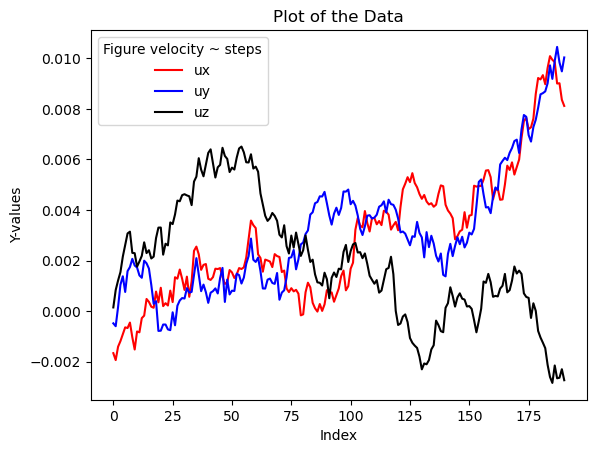

In [22]:
import yt
from matplotlib import rc_context
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
print(yt.__version__)

step1 = 20000
step2 = 400000
plot_int = 2000 #10
temperature = 1e-5
alpha0 = 0.
cs2 = 1./3.
nx = 16
ny = 16
nz = 16
ncomp = 19  # nvel in LBM
###############################################################

plot_file_hydrovs_root = ""
if temperature > 0:
    plot_file_hydrovs_root += "./data_mixture_momentsModify/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}_continue/plt".format(nx,ny,nz)
else:
    plot_file_hydrovs_root += "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz)

# load in noise multifab of each frame into ndarray
Nframes = (step2 - step1)//plot_int + 1
vel_ux_array = np.zeros((Nframes, 1))
vel_uy_array = np.zeros((Nframes, 1))
vel_uz_array = np.zeros((Nframes, 1))
for n in range(step1, step2+1, plot_int):
    plot_file_fnoise = plot_file_hydrovs_root + f"{n:07d}"
    ds0 = yt.load(plot_file_fnoise)
    hydrovs_data_frame = ds0.covering_grid(
    level=0, left_edge=ds0.domain_left_edge, dims=ds0.domain_dimensions)
    vel_ux_array[(n-step1)//plot_int] = np.mean(hydrovs_data_frame["boxlib", "ufx"])
    vel_uy_array[(n-step1)//plot_int] = np.mean(hydrovs_data_frame["boxlib", "ufy"])
    vel_uz_array[(n-step1)//plot_int] = np.mean(hydrovs_data_frame["boxlib", "ufz"])


step = np.arange(vel_ux_array.shape[0])
plt.plot(step, vel_ux_array, label="ux", color='r')
plt.plot(step, vel_uy_array, label="uy", color='b')
plt.plot(step, vel_uz_array, label="uz", color='k')
plt.legend(title="Figure velocity ~ steps")
plt.xlabel('Index')  # Label for x-axis
plt.ylabel('Y-values')  # Label for y-axis
plt.title('Plot of the Data')  # Title
plt.show()

yt : [INFO     ] 2025-04-13 02:59:42,582 Parameters: current_time              = 20000.0
yt : [INFO     ] 2025-04-13 02:59:42,584 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-04-13 02:59:42,585 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-04-13 02:59:42,587 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-04-13 02:59:42,702 Parameters: current_time              = 22000.0
yt : [INFO     ] 2025-04-13 02:59:42,704 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-04-13 02:59:42,704 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-04-13 02:59:42,705 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-04-13 02:59:42,815 Parameters: current_time              = 24000.0
yt : [INFO     ] 2025-04-13 02:59:42,815 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-04-13 02:59:42,816 Parameters: domain_left_edge          = [0. 0. 0

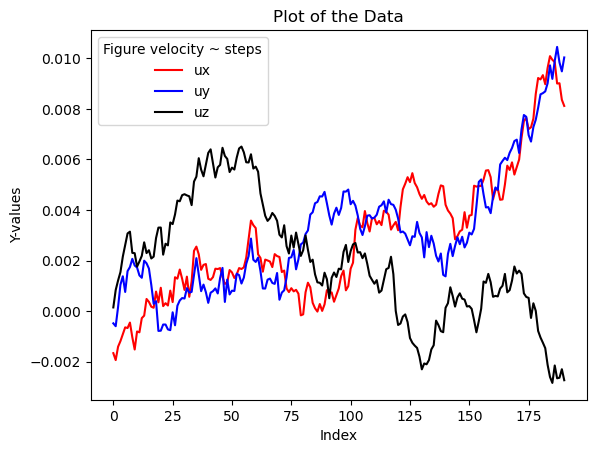

In [4]:
step1 = 20000
step2 = 400000
plot_file_hydrovs_root = ""
if temperature > 0:
    plot_file_hydrovs_root += "./data_mixture_velocityModify/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}_continue/plt".format(nx,ny,nz)
else:
    plot_file_hydrovs_root += "./data_mixture/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz)

# load in noise multifab of each frame into ndarray
Nframes = (step2 - step1)//plot_int + 1
vel_ux_array = np.zeros((Nframes, 1))
vel_uy_array = np.zeros((Nframes, 1))
vel_uz_array = np.zeros((Nframes, 1))
for n in range(step1, step2+1, plot_int):
    plot_file_fnoise = plot_file_hydrovs_root + f"{n:07d}"
    ds0 = yt.load(plot_file_fnoise)
    hydrovs_data_frame = ds0.covering_grid(
    level=0, left_edge=ds0.domain_left_edge, dims=ds0.domain_dimensions)
    vel_ux_array[(n-step1)//plot_int] = np.mean(hydrovs_data_frame["boxlib", "ufx"])
    vel_uy_array[(n-step1)//plot_int] = np.mean(hydrovs_data_frame["boxlib", "ufy"])
    vel_uz_array[(n-step1)//plot_int] = np.mean(hydrovs_data_frame["boxlib", "ufz"])


step = np.arange(vel_ux_array.shape[0])
plt.plot(step, vel_ux_array, label="ux", color='r')
plt.plot(step, vel_uy_array, label="uy", color='b')
plt.plot(step, vel_uz_array, label="uz", color='k')
plt.legend(title="Figure velocity ~ steps")
plt.xlabel('Index')  # Label for x-axis
plt.ylabel('Y-values')  # Label for y-axis
plt.title('Plot of the Data')  # Title
plt.show()